In [2]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from scipy.spatial import ConvexHull #for plotting rectangles (checking integrals)
import math

eV = 1.602e-19 #Joule, electronvolt
h = 6.62607004e-34 #J*s, planck constant
c = 2.99792e8 #m/s', speed of light

# TIMED SEE XPS data (0.05-39.95nm), level 4

In [3]:
df_see_xps = pd.read_csv("/Users/sebastiankalos/Documents/Moondust_new/irradiance_data/timed_see_xps_ssi_l4.csv")
irr_list = []

l=400
for i in range(int(len(df_see_xps)/400)):
    df_day = df_see_xps.iloc[i*l:(i+1)*l]
    wavelength_xps = df_day['wavelength (nm)'].tolist()
    irr = df_day['irradiance (W/m^2/nm)'].tolist()
    irr_list.append(irr)
irr_array = np.array(irr_list)
irradiance_xps = np.nanmedian(irr_array,axis=0) #average of almost 20 years!
irr_xps_stdev = np.nanstd(irr_array,axis=0)

# TIMED SEE lever 3 data (40.5-189.5nm)

In [4]:
df_irr_mid = pd.read_csv("/Users/sebastiankalos/Documents/Moondust_new/irradiance_data/timed_see_ssi_l3.csv") #reading Solar data csv file into a dataframe
df_irr_mid.loc[df_irr_mid['irradiance (W/m^2/nm)'] <0, 'irradiance (W/m^2/nm)'] = np.nan
df_irr_mid = df_irr_mid[df_irr_mid['wavelength (nm)'] >= 40]
irr_list = []
all_days = list(set(df_irr_mid['time (yyyyDDD)'].tolist())) #store all day identifiers and remove duplicates

for day_number in all_days:
    df_day = df_irr_mid[df_irr_mid['time (yyyyDDD)'] == day_number]
    wavelength_mid = df_day['wavelength (nm)'].tolist()
    irr = df_day['irradiance (W/m^2/nm)'].tolist()
    irr_list.append(irr)
irr_array = np.array(irr_list)
irradiance_mid = np.nanmedian(irr_array,axis=0) #average of almost 20 years!
irr_mid_stdev = np.nanstd(irr_array,axis=0)

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


# SORCE level 3 data (189.5-400nm)

In [5]:
df_irr_near = pd.read_csv("/Users/sebastiankalos/Documents/Moondust_new/irradiance_data/sorce_ssi_l3.csv") #reading Solar data csv file into a dataframe
df_irr_near.loc[df_irr_near['irradiance (W/m^2/nm)'] <0, 'irradiance (W/m^2/nm)'] = np.nan
df_irr_near = df_irr_near[df_irr_near['wavelength (nm)'] > 190]
irr_list = []
all_days = list(set(df_irr_near['time (Julian Date)'].tolist())) #store all day identifiers and remove duplicates
all_days = [ int(x) for x in all_days] #convert all items to integers

for day_number in all_days:
    df_day = df_irr_near[df_irr_near['time (Julian Date)'] == day_number]
    wavelength_near = df_day['wavelength (nm)'].tolist()
    irr = df_day['irradiance (W/m^2/nm)'].tolist()
    irr_list.append(irr)
irr_array = np.array(irr_list)
irradiance_near = np.nanmedian(irr_array,axis=0) #average of almost 20 years!
irr_near_stdev = np.nanstd(irr_array,axis=0)

In [6]:
irradiance = np.concatenate((irradiance_xps, irradiance_mid,irradiance_near))
wavelength = np.concatenate((wavelength_xps, wavelength_mid,wavelength_near))
irr_stdev = np.concatenate((irr_xps_stdev,irr_mid_stdev,irr_near_stdev))

In [7]:
def read_text_file(filename):
    photon_E, total_yield, yield_error = [],[],[]
    copy_lines=[]
    with open(filename) as f:
        lines = f.readlines()
    for line in lines:
        split_line = line.split()
        copy_lines.append(split_line)
    #from each line, extract a name/number and append it into its relevant column
    for i in range(1,len(copy_lines)-1): #2nd line in the file is the first relevant one
        line = copy_lines[i]
        photon_E.append(float(line[0])) #strip element name and type of commas
        total_yield.append(float(line[1]))
        yield_error.append(float(line[2]))
    return([np.array(photon_E), np.array(total_yield), np.array(yield_error)])

In [8]:
[Au_full_E, Au_full_TEY, Au_full_TEY_err] = read_text_file('TEY_files/Au_full_yield.txt')
[Mg_alloy_full_E, Mg_alloy_full_TEY, Mg_alloy_full_TEY_err] = read_text_file('TEY_files/Mg_alloy_full_yield.txt')
[Aerodag_full_E, Aerodag_full_TEY, Aerodag_full_TEY_err] = read_text_file('TEY_files/Aerodag_full_yield.txt')
[Graphite_full_E, Graphite_full_TEY, Graphite_full_TEY_err] = read_text_file('TEY_files/Graphite_full_yield.txt')
[Coverglass_full_E, Coverglass_full_TEY, Coverglass_full_TEY_err] = read_text_file('TEY_files/Coverglass_full_yield_NORM.txt')
[Ag_full_E, Ag_full_TEY, Ag_full_TEY_err] = read_text_file('TEY_files/Ag_full_yield_NORM.txt')
[Ti_full_E, Ti_full_TEY, Ti_full_TEY_err] = read_text_file('TEY_files/Ti_full_yield_NORM.txt')
[ITO_MLI_aug22_full_E, ITO_MLI_aug22_full_TEY, ITO_MLI_aug22_full_TEY_err] = read_text_file('TEY_files/ITO_MLI_aug22_full_yield_NORM.txt')

In [9]:
def ion_cutoff(E_vals=list, TEY_vals=list,name=str,stop_noise_eV=float,start_eV=float,stop_eV=float,noise_override=float):
    if stop_noise_eV>=start_eV:
        print('invalid eV interval chosen')
        return
    plt.plot(E_vals,TEY_vals,'--.',linewidth=1,label='yield data')
    plt.yscale('log')
    plt.xlim(3,15)

    x,y,noise=[],[],[]
    for xval,yval in zip(E_vals, TEY_vals):
        if xval>=start_eV and xval<=stop_eV:
            x.append(xval)
            y.append(yval)
        elif xval<stop_noise_eV:
            noise.append(yval)
    # extract intervals for linear regression, (reshape required!) and plot them over
    x = np.array(x).reshape((-1, 1))
    y = np.array(y)
    if noise_override==0:
        noise_lvl = np.mean(noise)
    else:
        noise_lvl=noise_override
    plt.plot(x, y,'.', color = 'orange', label='data taken for regression')
    # linear regression
    model = LinearRegression().fit(x, np.log(y))
    ion_cutoff = (np.log(noise_lvl)-model.intercept_)/model.coef_ #get x-intercept (cutoff) from slope and y-intercept

    x_vals = np.linspace(ion_cutoff[0],stop_eV,100) #get x-values for plotting the found regression
    y_vals = np.exp(model.coef_*x_vals+model.intercept_) #get y vales of the linear regression

    new_E_vals = list(x_vals) #initialize an array for a new ph.energy data, using the regression for low energy values
    new_TEY_vals = list(y_vals) #initialize an array for a new YIELD data, using the regression for low energy values
    for E_val,TEY_val in zip(E_vals,TEY_vals):
        if E_val > x_vals[-1]: #starting at the highest photon energy from the regression, append from the original
            new_E_vals.append(E_val)
            new_TEY_vals.append(TEY_val)

    plt.plot(x_vals,y_vals,label='regression')
    plt.vlines(x = ion_cutoff[0],ymin=0,ymax=noise_lvl,color='purple')
    plt.text(s='ionization\ncutoff = {:0.2f} eV'.format(ion_cutoff[0]), x=ion_cutoff[0]+0.1, y=0.1*noise_lvl,color='purple')
    plt.hlines(y = noise_lvl,xmin=3,xmax=ion_cutoff[0],color='black',linestyle='--')
    plt.text(s='noise level', x=3.1, y=1.1*noise_lvl)

    plt.xlabel('photon energy [eV]')
    plt.ylabel('yield')
    plt.legend()
    plt.title(name)
    plt.ylim(1e-7,1)
    plt.grid(which = 'major', linestyle='-',color='0.85')
    plt.grid(which = 'minor', linestyle='--', color='0.85')
    plt.savefig(f"plots/ion_thresh_"+name+".png", bbox_inches='tight', dpi=300)

    return [ion_cutoff[0],new_E_vals,new_TEY_vals]

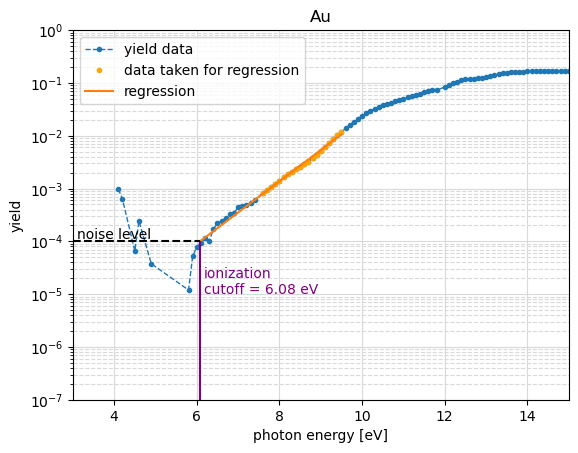

In [10]:
Au_ion_thresh,Au_E_NEW,Au_TEY_NEW = ion_cutoff(E_vals=Au_full_E, TEY_vals=Au_full_TEY,name='Au',stop_noise_eV=5.5,start_eV=7.5,stop_eV=9.5,noise_override=1e-4)

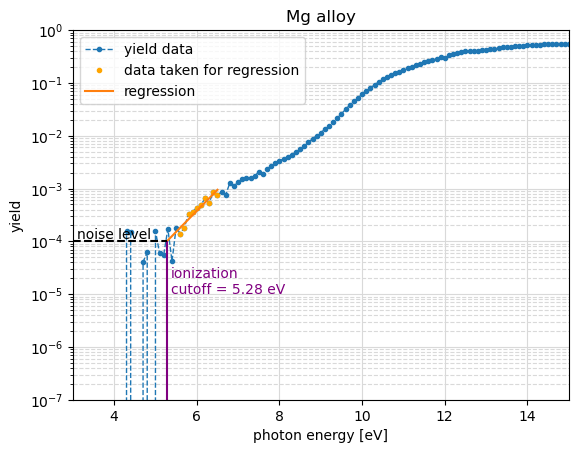

In [11]:
Mg_alloy_ion_thresh,Mg_alloy_E_NEW,Mg_alloy_TEY_NEW = ion_cutoff(E_vals=Mg_alloy_full_E, TEY_vals=Mg_alloy_full_TEY,name='Mg alloy',stop_noise_eV=5,start_eV=5.5,stop_eV=6.5,noise_override=1e-4)

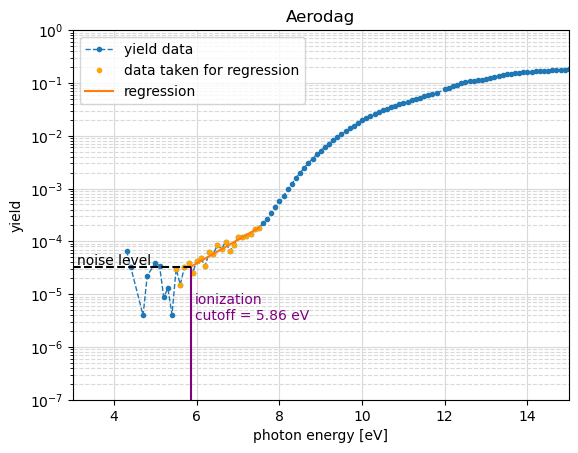

In [12]:
Aerodag_ion_thresh,Aerodag_E_NEW,Aerodag_TEY_NEW=ion_cutoff(E_vals=Aerodag_full_E, TEY_vals=Aerodag_full_TEY,name='Aerodag',stop_noise_eV=5,start_eV=5.5,stop_eV=7.5,noise_override=0)

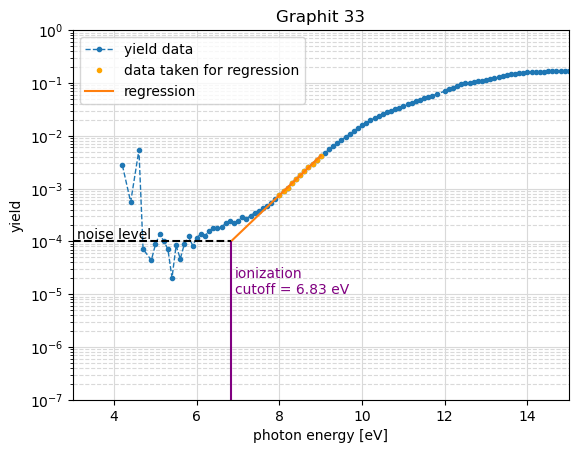

In [13]:
Graphite_ion_thresh,Graphite_E_NEW,Graphite_TEY_NEW=ion_cutoff(E_vals=Graphite_full_E, TEY_vals=Graphite_full_TEY,name='Graphit 33',stop_noise_eV=6.5,start_eV=8,stop_eV=9,noise_override=1e-4)

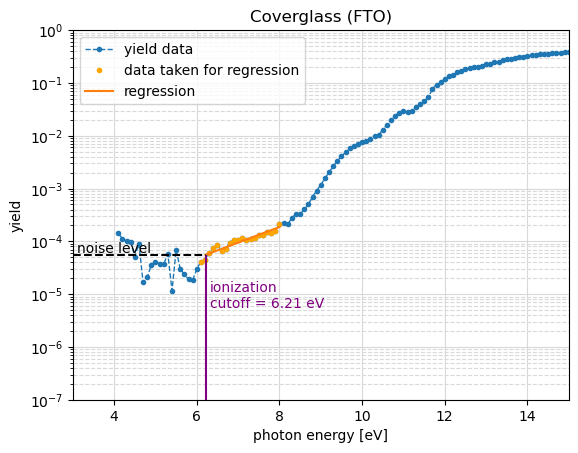

In [14]:
Coverglass_ion_thresh,Coverglass_E_NEW,Coverglass_TEY_NEW=ion_cutoff(E_vals=Coverglass_full_E, TEY_vals=Coverglass_full_TEY,name='Coverglass (FTO)',stop_noise_eV=5.9,start_eV=6,stop_eV=8,noise_override=0)

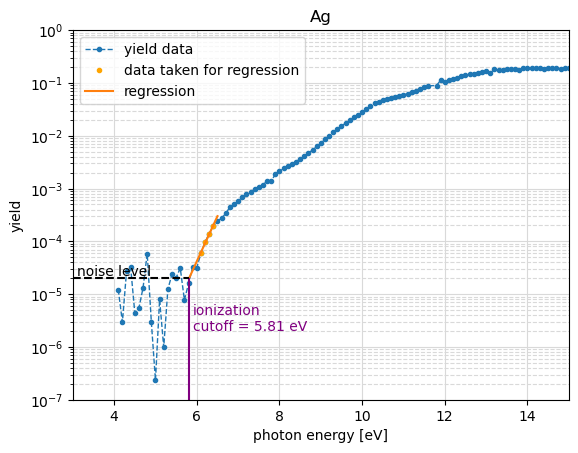

In [15]:
Ag_ion_thresh,Ag_E_NEW,Ag_TEY_NEW=ion_cutoff(E_vals=Ag_full_E, TEY_vals=Ag_full_TEY,name='Ag',stop_noise_eV=5.8,start_eV=6,stop_eV=6.5,noise_override=2e-5)

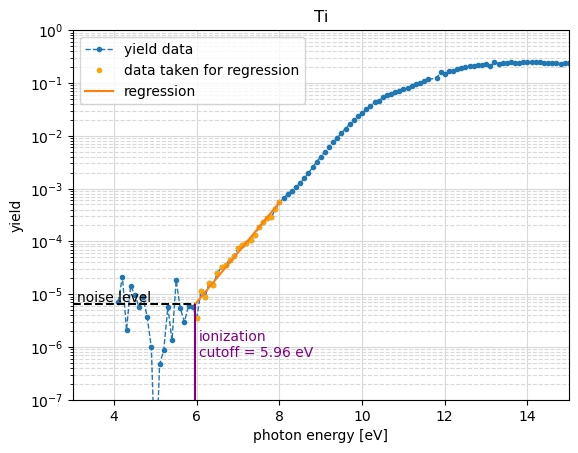

In [16]:
Ti_ion_thresh,Ti_E_NEW,Ti_TEY_NEW=ion_cutoff(E_vals=Ti_full_E, TEY_vals=Ti_full_TEY,name='Ti',stop_noise_eV=5.8,start_eV=6,stop_eV=8,noise_override=0)

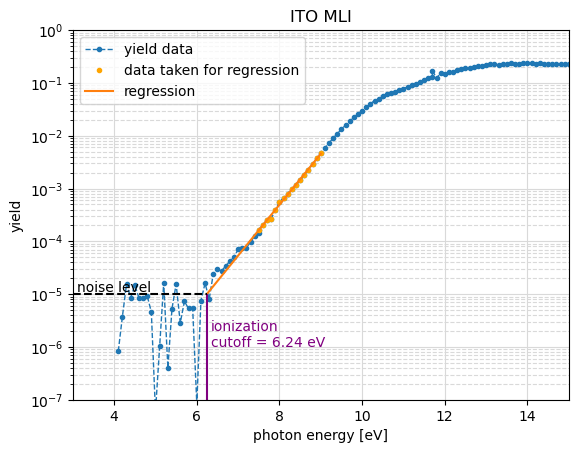

In [107]:
ITO_ion_thresh,ITO_E_NEW,ITO_TEY_NEW=ion_cutoff(E_vals=ITO_MLI_aug22_full_E, TEY_vals=ITO_MLI_aug22_full_TEY,name='ITO MLI',stop_noise_eV=5.8,start_eV=7.5,stop_eV=9,noise_override=1e-5)

In [108]:
def convert_eV_to_nm(energy_eV_list):
    # a simple function that takes a list with photon energy values (in eV) and converts them into wavelength (in nm)
    wavelength_list = []
    for datapoint in energy_eV_list:
        energy_J = datapoint * eV
        wavelength_list.append(h*c/energy_J*1e9) #in nm
    return(wavelength_list)

In [120]:
def split_by_nm(eV_list=list,TEY_list=list,thresholds_nm=list):
    nm_list = convert_eV_to_nm(eV_list) #convert list of photon energies to nm
    start_nm = thresholds_nm[0] 
    stop_nm = thresholds_nm[1]
    def condition(x, start, stop): return (x >= start and x<stop)
    output = [idx for idx, element in enumerate(nm_list) if condition(element,start_nm,stop_nm)]
    picked_nm = [nm_list[ind] for ind in output]
    picked_TEY = [TEY_list[ind] for ind in output]
    return [picked_nm,picked_TEY]

def split_to_fit(eV_list=list,TEY_list=list,nm_limits=list,orders=list):
    fits = []
    for i in range(len(nm_limits)-1): #there only are n-1 gaps between n trees!
        start = nm_limits[i] 
        stop = nm_limits[i+1]
        [nm,tey] = split_by_nm(eV_list=eV_list,TEY_list=TEY_list,thresholds_nm=[start,stop])
        fit = np.poly1d(np.polyfit(nm, tey, orders[i]))
        fits.append(fit)
    return fits

In [121]:
import warnings
warnings.filterwarnings('ignore')# just to get rid of annoying texts being printed in output

In [184]:
def integrate_J(eV_list=list,TEY_list=list,name=str,ion_threshold_eV=float):
    ion_thresh_nm = convert_eV_to_nm([ion_threshold_eV])[0] #convert inonization threshold to nm
    #wavelengths (nm) at which yield data shall be split into regions (for polynomial fitting):
    lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190,ion_thresh_nm] #delimitiations of wavelength regions into which the yield will be split (for plynomial fitting)
    orders = [ 15, 15,  15,  15,   15,  15,   10,   3,  3]#each polynomial fit needs to have an order specified

    fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)#initialize a plot
    ax2 = ax1.twinx()#make a dual y-axis
    ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)#plot yield data vs wavelength in nm
    ax1.axvline(x=ion_thresh_nm,color='purple') #plot a vertical line with the ionization threshold, and print an accompanying text
    ax1.text(s='ionization threshold\n{:0.1f} nm = {:0.2f} eV'.format(ion_thresh_nm,ion_threshold_eV),x=ion_thresh_nm+2,y=0.1,color='purple')
    ax1.set_yscale('log')
    ax1.set_xlim(0,ion_thresh_nm+40)
    ax1.set_ylabel('yield')

    fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders) #find the polynomial fits to yield

    regs = []
    for i in range(len(lims)-1):
        reg = np.linspace(lims[i],lims[i+1],1000)
        regs.append(reg)

    for nm,fit in zip(regs,fits): #plot polynomial fits to the yield (just to check, and)
        tey = fit(nm) #yield of that region is the wavelength region run through the generated polynomial fit
        ax1.plot(nm,tey)

########################################################
    #[nm,flux] = el_flux(wavelength,irradiance,lims,fits)
    J=0 #initial current density before the integral is performed
    if True:
        spectral_flux = []
        used_lambda = []
        for i in range(len(wavelength)):
            if i+1<len(wavelength):
                d_nm=(wavelength[i+1]-wavelength[i])

            lambda_val=wavelength[i]
            irr_val=irradiance[i]
            flag = 0 #is the region of interest found (split into regions due to polynomial fitting of yield data)
            for l in range(len(lims)-1): #find the proper region (again, #of regions is one minus the number of limits)
                if lambda_val >= lims[l] and lambda_val < lims[l+1]:
                    current_reg = l #save the order number of the polyfit region in which the wavelength is located
                    flag  = 1

            if flag: #if the region is indeed found
                fit = fits[current_reg] #fit takes in wavelength in nm, not m!
                spectral_flux_val = fit(lambda_val)*irr_val*(lambda_val*1e-9)/(h*c) # * d_lambda only in the full integral, not spectrum!
                spectral_flux.append(spectral_flux_val)
                used_lambda.append(lambda_val)

                if math.isnan(spectral_flux_val):
                    print("problem with spectral flux value at {:.0f} nm".format(lambda_val))
                else:
                    if math.isnan(lambda_val):
                        print("problem with lambda value")
                    else:
                        pts1 = [[lambda_val-d_nm/2, 0], [lambda_val-d_nm/2, spectral_flux_val*eV], [lambda_val+d_nm/2, 0.0], [lambda_val+d_nm/2, spectral_flux_val*eV]]
                        pts = np.array(pts1)
                        hull = ConvexHull(pts)
                        ax2.fill(pts[hull.vertices,0], pts[hull.vertices,1],'red',alpha=0.5)

                        J+=spectral_flux_val*eV*d_nm #d_nm, not d_nm*1e-9 (irradiance by nm already, not by m)

        
        nm=np.array(used_lambda)
        flux=np.array(spectral_flux)

########################################################


    ax2.plot(nm,flux*eV,'.',color='black',linestyle='-',markersize=1,linewidth=1)
    ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

    ax2.set_yscale('log')
    plt.title(name)

    ax3 = ax1.twiny()
    new_eV_ticks=[5,6,7,8,9,10,12,15,20,30,40,60,100,1500]
    new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_xticks(new_tick_locations)
    ax3.set_xticklabels(new_eV_ticks)
    ax3.set_xlabel('photon energy [eV]',size=12)

    print('Current density [uA/m^2]: {:.1f}'.format(J*1e6))

    return round(J*1e6,2) #return current density in microamps/m^2, rounded to two decimals


problem with spectral flux value at 190 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 194 nm
problem with spectral flux value at 194 nm
Current density [uA/m^2]: 41.0


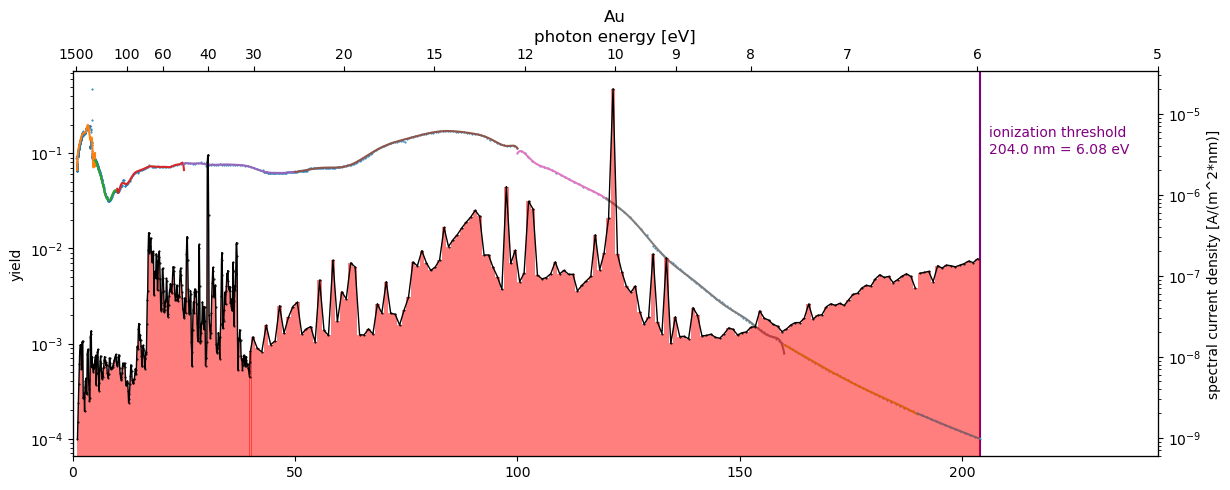

In [185]:
Au_J=integrate_J(eV_list=Au_E_NEW,TEY_list=Au_TEY_NEW,name='Au',ion_threshold_eV=Au_ion_thresh)

problem with spectral flux value at 190 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 194 nm
problem with spectral flux value at 194 nm
Current density [uA/m^2]: 157.6


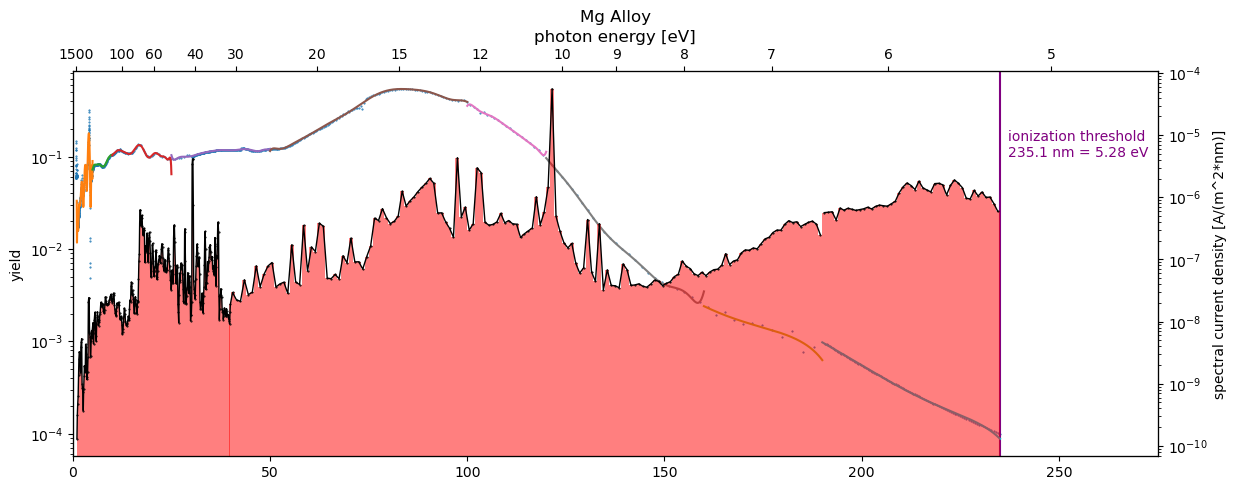

In [186]:
Mg_alloy_J=integrate_J(eV_list=Mg_alloy_E_NEW,TEY_list=Mg_alloy_TEY_NEW,name='Mg Alloy',ion_threshold_eV=Mg_alloy_ion_thresh)

problem with spectral flux value at 190 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 194 nm
problem with spectral flux value at 194 nm
Current density [uA/m^2]: 34.4


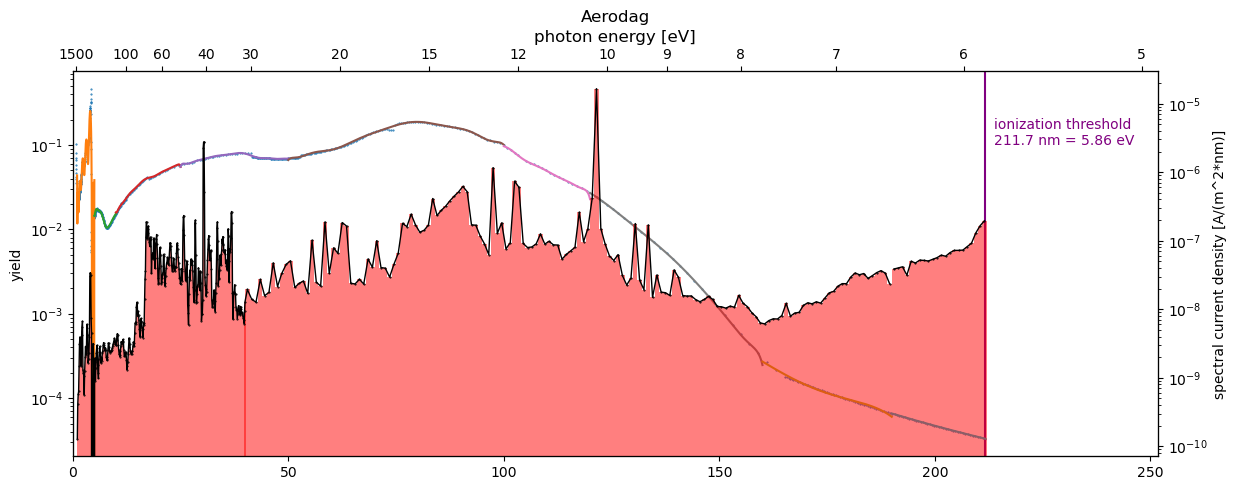

In [187]:
Aerodag_J=integrate_J(eV_list=Aerodag_E_NEW,TEY_list=Aerodag_TEY_NEW,name='Aerodag',ion_threshold_eV=Aerodag_ion_thresh)

TypeError: expected non-empty vector for x

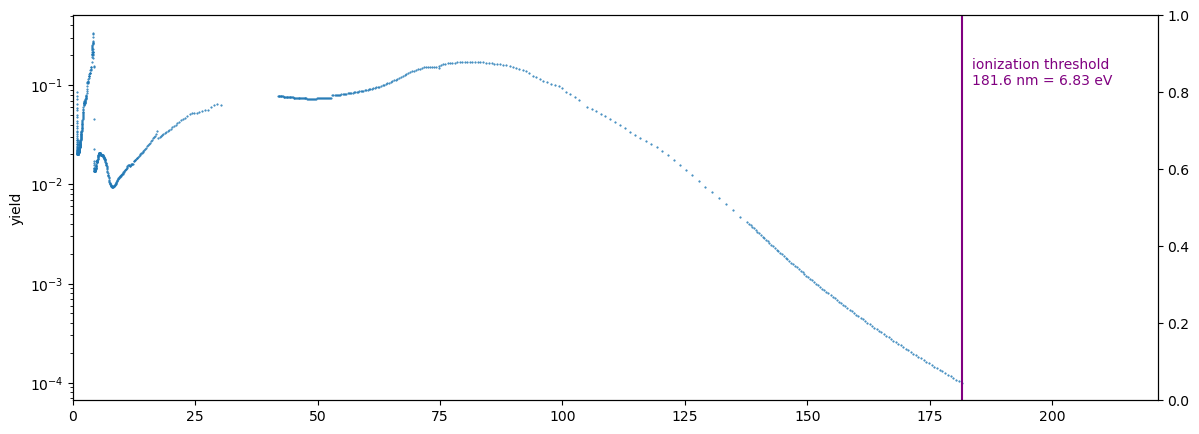

In [188]:
Graphite_J=integrate_J(eV_list=Graphite_E_NEW,TEY_list=Graphite_TEY_NEW,name='Graphit 33',ion_threshold_eV=Graphite_ion_thresh)

problem with spectral flux value at 190 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 194 nm
problem with spectral flux value at 194 nm
Current density [uA/m^2]: 3.64e+01


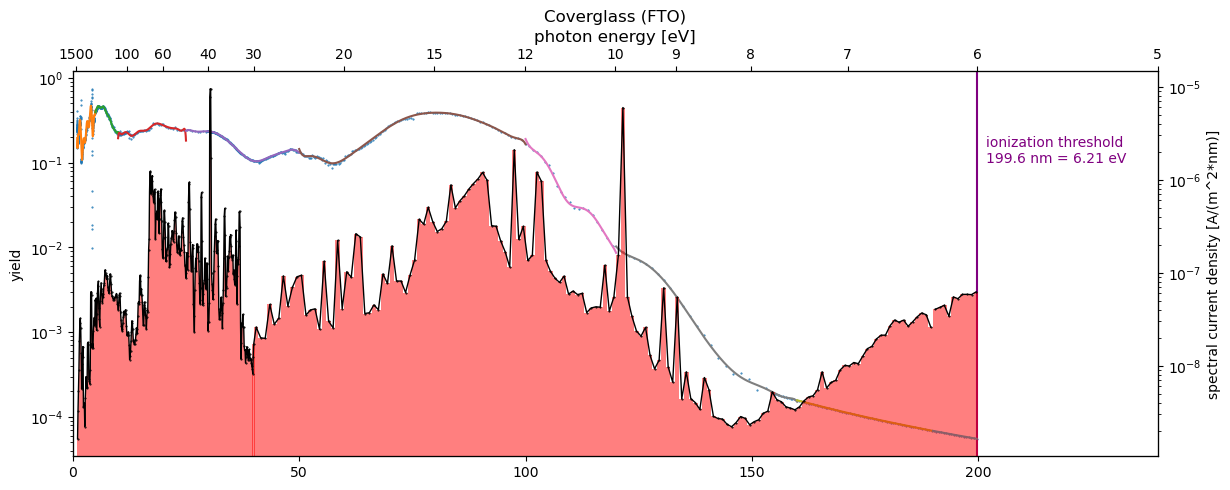

In [ ]:
Coverglass_J=integrate_J(eV_list=Coverglass_E_NEW,TEY_list=Coverglass_TEY_NEW,name='Coverglass (FTO)',ion_threshold_eV=Coverglass_ion_thresh)

problem with spectral flux value at 190 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 194 nm
problem with spectral flux value at 194 nm
Current density [uA/m^2]: 5.10e+01


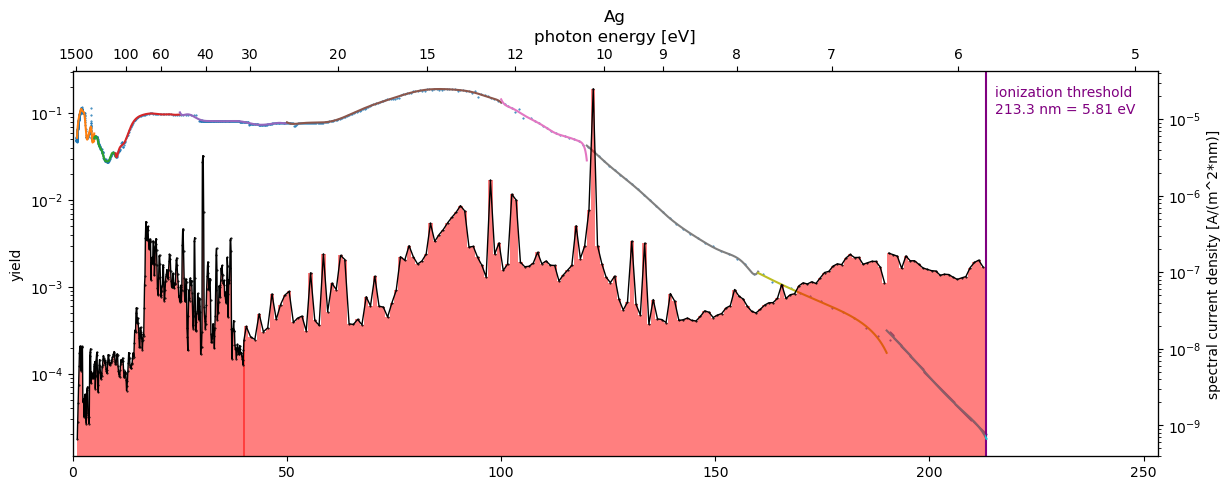

In [ ]:
Ag_J=integrate_J(eV_list=Ag_E_NEW,TEY_list=Ag_TEY_NEW,name='Ag',ion_threshold_eV=Ag_ion_thresh)

problem with spectral flux value at 190 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 194 nm
problem with spectral flux value at 194 nm
Current density [uA/m^2]: 4.99e+01


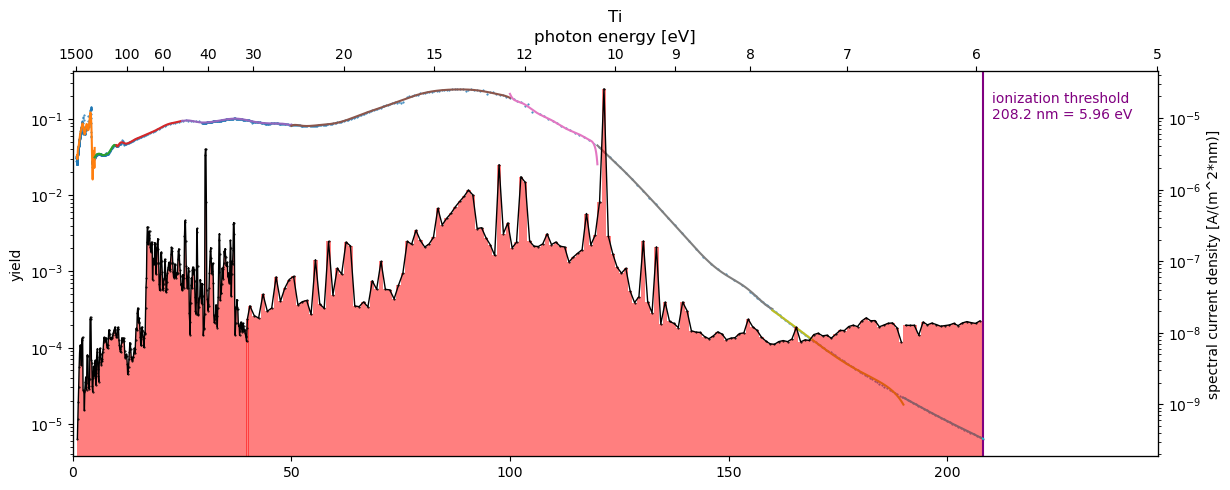

In [ ]:
Ti_J=integrate_J(eV_list=Ti_E_NEW,TEY_list=Ti_TEY_NEW,name='Ti',ion_threshold_eV=Ti_ion_thresh)

problem with spectral flux value at 190 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 192 nm
problem with spectral flux value at 194 nm
problem with spectral flux value at 194 nm
Current density [uA/m^2]: 5.27e+01


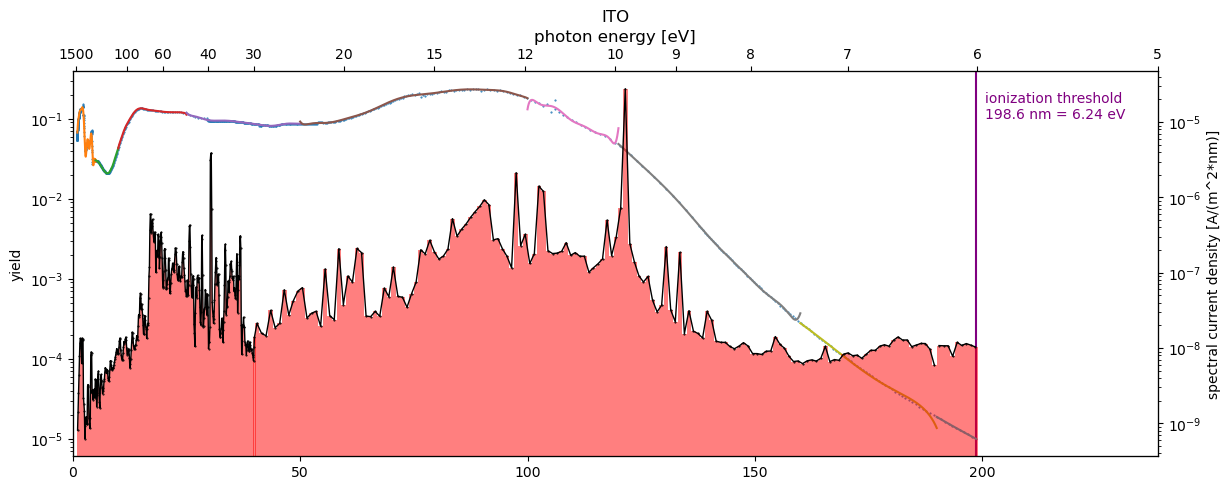

In [ ]:
ITO_J=integrate_J(eV_list=ITO_E_NEW,TEY_list=ITO_TEY_NEW,name='ITO',ion_threshold_eV=ITO_ion_thresh)

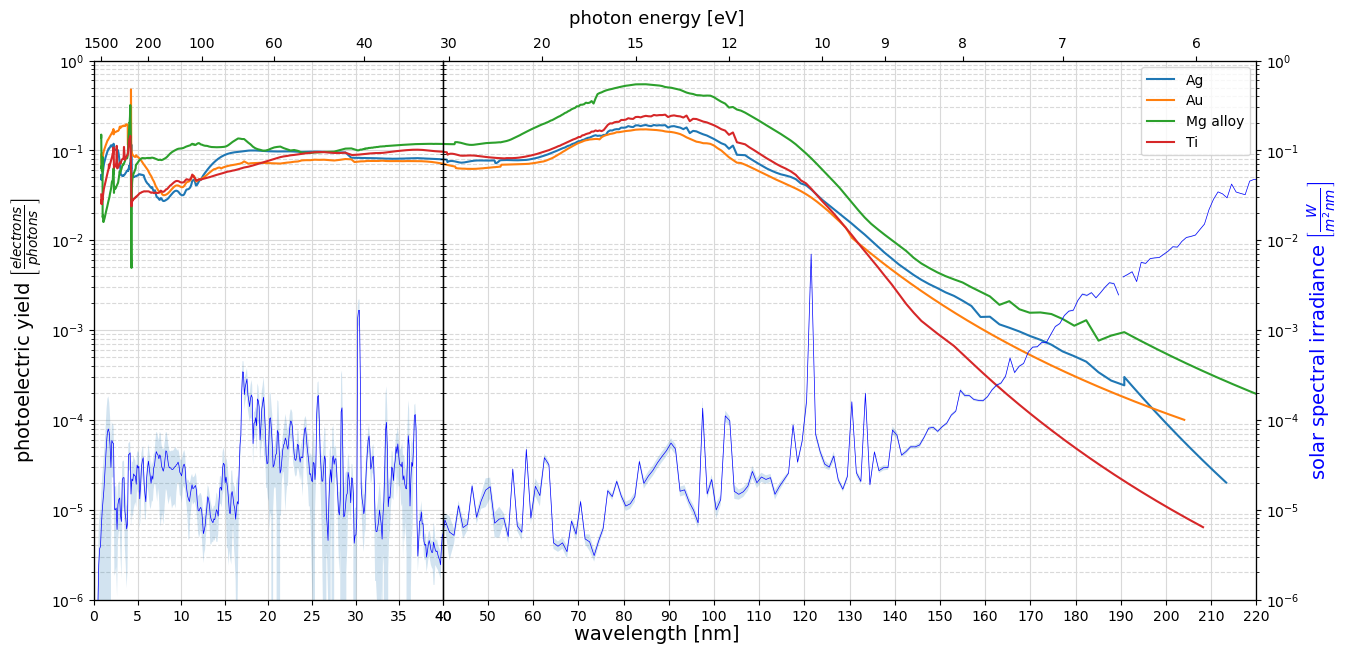

In [192]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (15,7),dpi=100)
gs = gridspec.GridSpec(1, 10)
gs.update(wspace=0.0, hspace=0.00) # set the spacing between axes. 

marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

ax1 = plt.subplot(gs[0,:3])
ax2 = plt.subplot(gs[0,3:])

ax3 = ax1.twinx()
ax3.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax3.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax4 = ax2.twinx()
ax4.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax4.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Ag_E_NEW),Ag_TEY_NEW,'-',markersize=1)
ax2.plot(convert_eV_to_nm(Ag_E_NEW),Ag_TEY_NEW,'-',markersize=1,label='Ag')

ax1.plot(convert_eV_to_nm(Au_E_NEW),Au_TEY_NEW,'-',markersize=1)
ax2.plot(convert_eV_to_nm(Au_E_NEW),Au_TEY_NEW,'-',markersize=1,label='Au')

ax1.plot(convert_eV_to_nm(Mg_alloy_E_NEW),Mg_alloy_TEY_NEW,'-',markersize=1)
ax2.plot(convert_eV_to_nm(Mg_alloy_E_NEW),Mg_alloy_TEY_NEW,'-',markersize=1,label='Mg alloy')

ax1.plot(convert_eV_to_nm(Ti_E_NEW),Ti_TEY_NEW,'-',markersize=1)
ax2.plot(convert_eV_to_nm(Ti_E_NEW),Ti_TEY_NEW,'-',markersize=1,label='Ti')

x_stop = 220
ax1.set_xlim(0,40)
ax2.set_xlim(40,x_stop)

ax1.set_ylim([1e-6,1])
ax2.set_ylim([1e-6,1])
ax3.set_ylim([1e-6,1])
ax4.set_ylim([1e-6,1])
ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale('log')
ax4.set_yscale('log')

plt.figtext(0.5, 0.06, 'wavelength [nm]', ha='center', va='center',size=14)
plt.figtext(0.5, 0.94, 'photon energy [eV]', ha='center', va='center',size=13)
ax1.set_ylabel(r"photoelectric yield $\left[\frac{electrons}{photons}\right]$",size=14)
ax1.grid(which = 'major', linestyle='-',color='0.85')
ax1.grid(which = 'minor', linestyle='--', color='0.85')

ax2.grid(which = 'major', linestyle='-',color='0.85')
ax2.grid(which = 'minor', linestyle='--', color='0.85')
ax2.set_xticks(np.arange(40,x_stop+1,10))
ax2.set_yscale('log')

ax2.set_yticks([])
ax3.set_yticks([])

ax6 = ax2.twiny()
new_eV_ticks=[6,7,8,9,10,12,15,20,30]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax6.set_xlim(ax2.get_xlim())
ax6.set_xticks(new_tick_locations)
ax6.set_xticklabels(new_eV_ticks)

ax5 = ax1.twiny()
new_eV_ticks=[40,60,100,200,1500]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax5.set_xlim(ax1.get_xlim())
ax5.set_xticks(new_tick_locations)
ax5.set_xticklabels(new_eV_ticks)

ax2.legend()

ax4.set_ylabel(r"solar spectral irradiance $\left[\frac{W}{m^2 nm}\right]$",color='blue',size=14)

plt.savefig('plots/metals_ion_threshs.png', bbox_inches='tight', dpi=300)

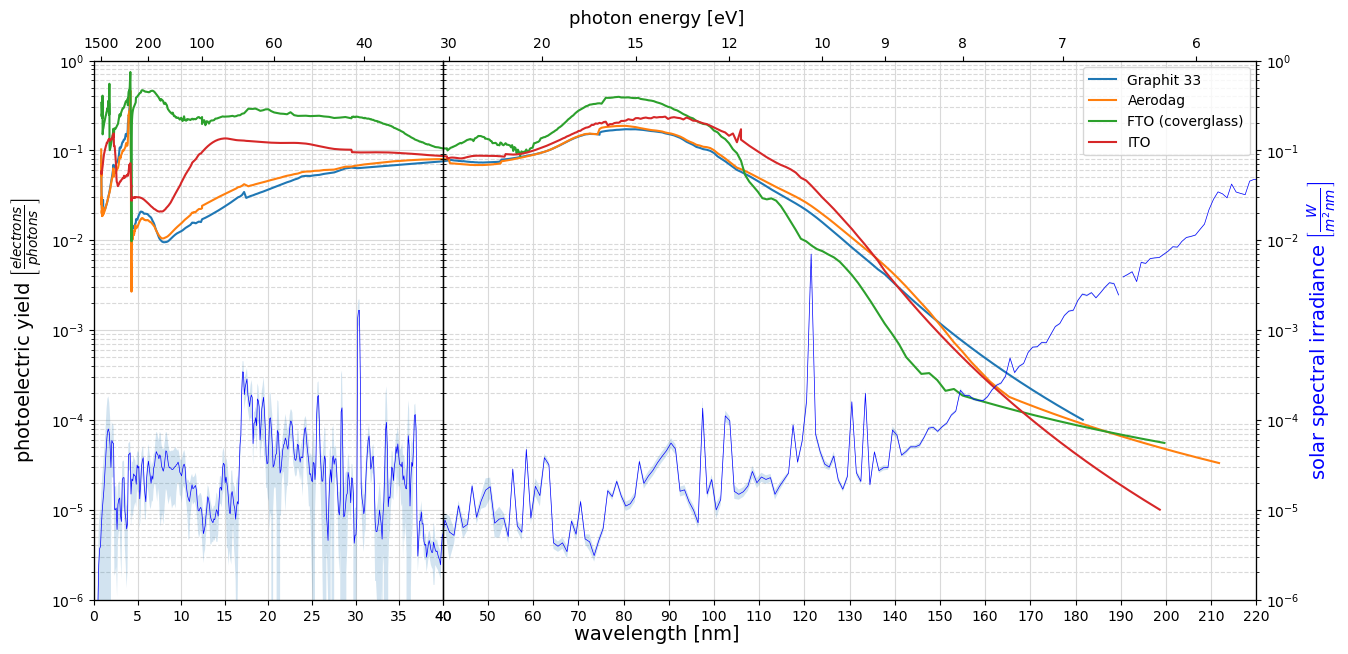

In [193]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (15,7),dpi=100)
gs = gridspec.GridSpec(1, 10)
gs.update(wspace=0.0, hspace=0.00) # set the spacing between axes. 

marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

ax1 = plt.subplot(gs[0,:3])
ax2 = plt.subplot(gs[0,3:])

ax3 = ax1.twinx()
ax3.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax3.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax4 = ax2.twinx()
ax4.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax4.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Graphite_E_NEW),Graphite_TEY_NEW,'-',markersize=1)
ax2.plot(convert_eV_to_nm(Graphite_E_NEW),Graphite_TEY_NEW,'-',markersize=1,label='Graphit 33')

ax1.plot(convert_eV_to_nm(Aerodag_E_NEW),Aerodag_TEY_NEW,'-',markersize=1)
ax2.plot(convert_eV_to_nm(Aerodag_E_NEW),Aerodag_TEY_NEW,'-',markersize=1,label='Aerodag')

ax1.plot(convert_eV_to_nm(Coverglass_E_NEW),Coverglass_TEY_NEW,'-',markersize=1)
ax2.plot(convert_eV_to_nm(Coverglass_E_NEW),Coverglass_TEY_NEW,'-',markersize=1,label='FTO (coverglass)')

ax1.plot(convert_eV_to_nm(ITO_E_NEW),ITO_TEY_NEW,'-',markersize=1)
ax2.plot(convert_eV_to_nm(ITO_E_NEW),ITO_TEY_NEW,'-',markersize=1,label='ITO')

x_stop = 220
ax1.set_xlim(0,40)
ax2.set_xlim(40,x_stop)

ax1.set_ylim([1e-6,1])
ax2.set_ylim([1e-6,1])
ax3.set_ylim([1e-6,1])
ax4.set_ylim([1e-6,1])
ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale('log')
ax4.set_yscale('log')

plt.figtext(0.5, 0.06, 'wavelength [nm]', ha='center', va='center',size=14)
plt.figtext(0.5, 0.94, 'photon energy [eV]', ha='center', va='center',size=13)
ax1.set_ylabel(r"photoelectric yield $\left[\frac{electrons}{photons}\right]$",size=14)
ax1.grid(which = 'major', linestyle='-',color='0.85')
ax1.grid(which = 'minor', linestyle='--', color='0.85')

ax2.grid(which = 'major', linestyle='-',color='0.85')
ax2.grid(which = 'minor', linestyle='--', color='0.85')
ax2.set_xticks(np.arange(40,x_stop+1,10))
ax2.set_yscale('log')

ax2.set_yticks([])
ax3.set_yticks([])

ax6 = ax2.twiny()
new_eV_ticks=[6,7,8,9,10,12,15,20,30]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax6.set_xlim(ax2.get_xlim())
ax6.set_xticks(new_tick_locations)
ax6.set_xticklabels(new_eV_ticks)

ax5 = ax1.twiny()
new_eV_ticks=[40,60,100,200,1500]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax5.set_xlim(ax1.get_xlim())
ax5.set_xticks(new_tick_locations)
ax5.set_xticklabels(new_eV_ticks)

ax2.legend()

ax4.set_ylabel(r"solar spectral irradiance $\left[\frac{W}{m^2 nm}\right]$",color='blue',size=14)

plt.savefig('plots/non-metals_ion_threshs.png', bbox_inches='tight', dpi=300)

# Summary:

In [189]:
d = {'sample': ["Au","Ag", "Mg Alloy","Ti","ITO","Coverglass (FTO)", "Aerodag"],
     'ionization [eV]': [Au_ion_thresh, Ag_ion_thresh,Mg_alloy_ion_thresh,Ti_ion_thresh,ITO_ion_thresh,Coverglass_ion_thresh,Aerodag_ion_thresh],
     r'J [uA/m^2]':[Au_J,Ag_J,Mg_alloy_J,Ti_J,ITO_J,Coverglass_J,Aerodag_J]
     }
df = pd.DataFrame(data=d)
df

,sample,ionization [eV],J [uA/m^2]
0,Au,6.077554,41.00
1,Ag,5.813116,51.02
2,Mg Alloy,5.275258,157.64
3,Ti,5.956022,49.95
4,ITO,6.243039,52.73
5,Coverglass (FTO),6.210821,36.38
6,Aerodag,5.856588,34.38
